Load the titanic dataset

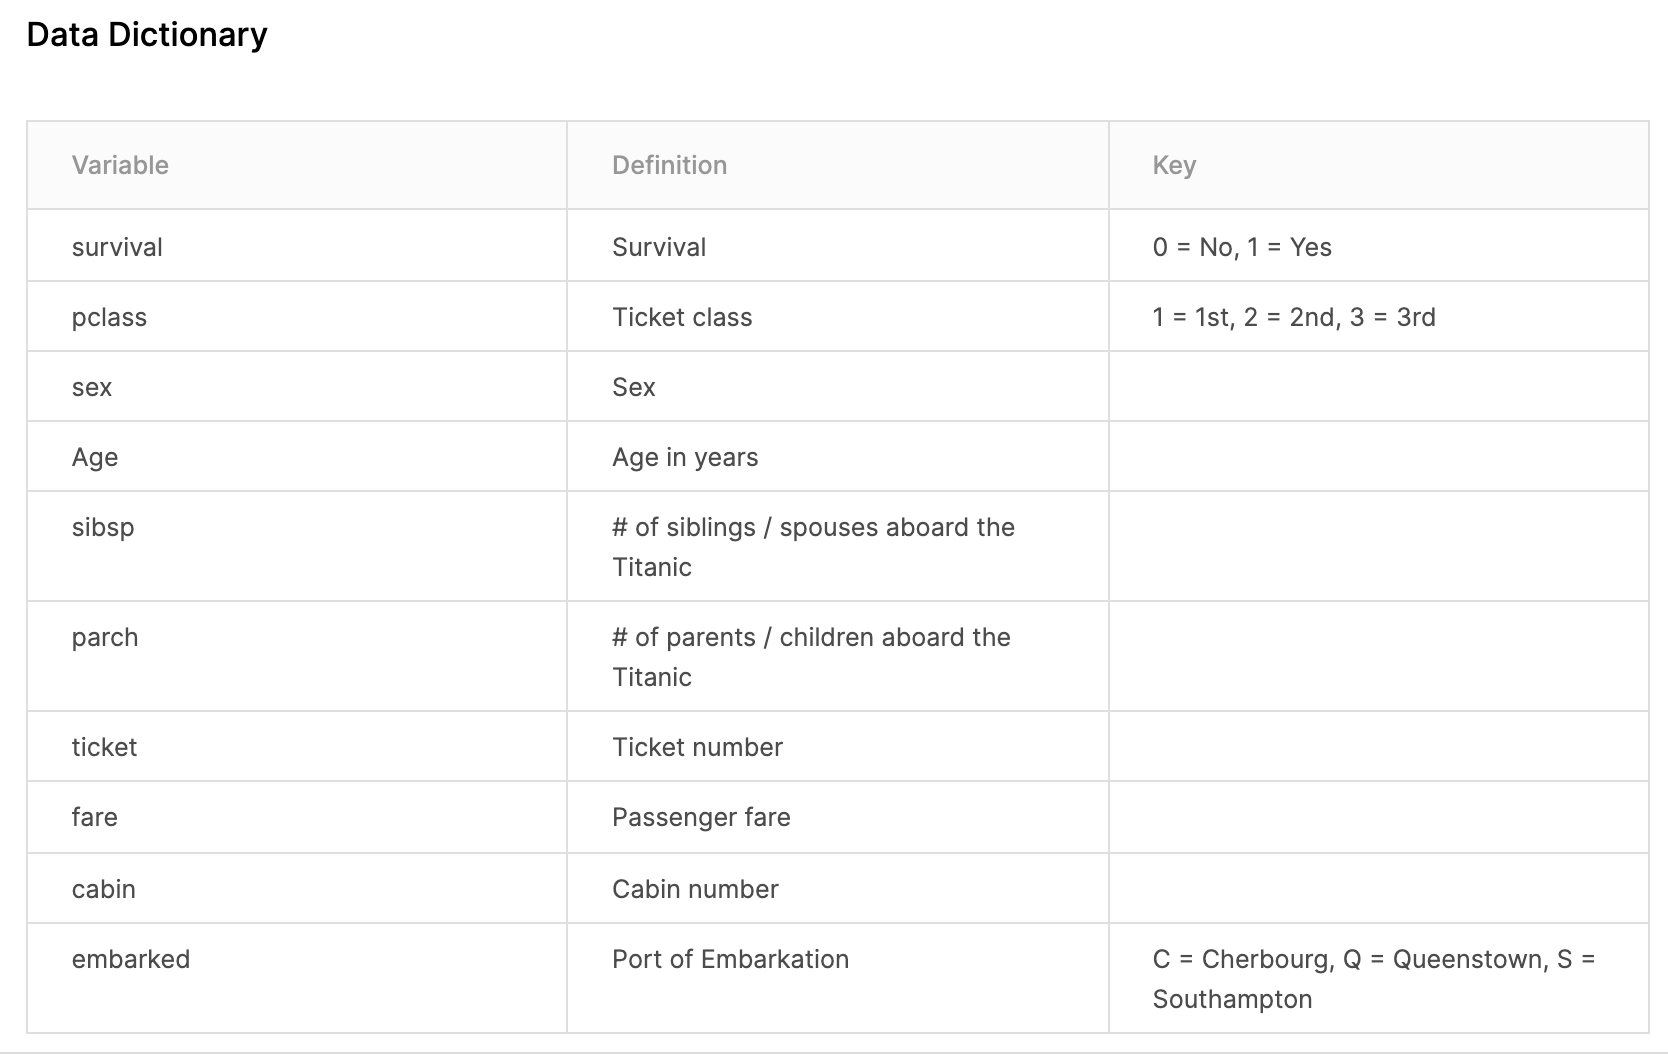

In [26]:
from IPython.display import Image
Image(filename='img/titanic_data_descr.png')

In [117]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/titanic/train.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C


**What we can do?**

Read the doc:
https://plotly.com/python/plotly-express/

See at the base plot types:
- Scatter Plot
- Line Plot
- Bar Plot
- Pie Chart
- Map Box*
- Colored Tables*

Let's draw!

In [28]:
import plotly.express as px


#### Scatter Plot

When is it useful?
When two numerical series can:
- be combined into clusters,
- contain outliers
- have some patterns

Do passengers' fares depend on age?

*Doc: https://plotly.com/python/line-and-scatter/*

In [41]:
def draw_scatter(df, x, y, title='Scatter plot', x_label='x', y_label='y', color=None, hover_data=None, hover_name=None):
    #fig = px.line(x=["a","b","c"], y=[1, 3, 2], title=title)
    fig = px.scatter(df,
        x=x,
        y=y,
        title=title,
        color=color,
        hover_data=hover_data,
        #hover_name=hover_name
    )
    fig.layout.xaxis.title = x_label
    fig.layout.yaxis.title = y_label
    #fig.layout.hoverlabel.plotly_name[0] = 'asdad'
    fig.show()

# Usage example:
draw_scatter(
    df,
    'Age',
    'Fare',
    x_label='Age',
    y_label='Fare',
    color='Sex',
    hover_data=['Pclass', 'Survived'],
    #hover_name=['Pclass', 'Survived'],
    title='Fares from Age'
)


Prepare data frame for another plots...

In [162]:
# prepare data
temp_df = df.dropna()
ages = set([round(age) for age in temp_df['Age']])
counter_ages = dict.fromkeys(ages, 0)

for age in temp_df['Age']:
   counter_ages[round(age)]+=1

counter_ages.values()
data = {'Age': list(counter_ages.keys()), 'Count': list(counter_ages.values())}

ages_df = pd.DataFrame.from_dict(data, orient='columns')
ages_df.sample(5)

,Age,Count
6,14,1
57,71,1
23,32,4
27,36,12
32,41,1


#### Bar Plot

In [159]:
def draw_bar(df, x, y, title='Line plot', x_label='x', y_label='y', color=None, hover_data=None):
    #fig = px.line(x=["a","b","c"], y=[1, 3, 2], title=title)
    fig = px.bar(
        df,
        x=x,
        y=y,
        title=title,
        color=color,
        hover_data=hover_data,
    )
    fig.layout.xaxis.title = x_label
    fig.layout.yaxis.title = y_label
    fig.show()

draw_bar(
    ages_df,
    'Age',
    'Count',
    title='Age distribution',
    x_label='age',
    y_label='passenger count'
)

#### Line Plot

Some continuous value y = f(x), like:
- Count items from time
- Price from time

Count of children and parents from age

In [161]:
def draw_line(df, x, y, title='Line plot', x_label='x', y_label='y', color=None, hover_data=None):
    #fig = px.line(x=["a","b","c"], y=[1, 3, 2], title=title)
    fig = px.line(
        df,
        x=x,
        y=y,
        title=title,
        color=color,
        hover_data=hover_data,
    )
    fig.layout.xaxis.title = x_label
    fig.layout.yaxis.title = y_label
    fig.show()

draw_line(
    ages_df,
    'Age',
    'Count',
    title='Age distribution',
    x_label='age',
    y_label='passenger count'
)

#### Pie Chart

In [126]:
def draw_pie(df, names, values, title='Pie Chart'):
    fig = px.pie(
        df,
        names=names,
        values=values,
        title=title
    )
    fig.show()

draw_pie(df, 'Sex', 'Pclass', 'Male vs Female')
